# Assignment 4
# CS 686

# Kamran Karim
# 20594936

In [51]:
from IPython.display import Image

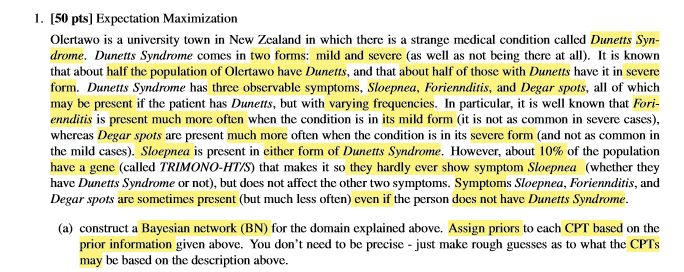

In [52]:
fig = Image(filename=("Q1a.JPG"))
display(fig)

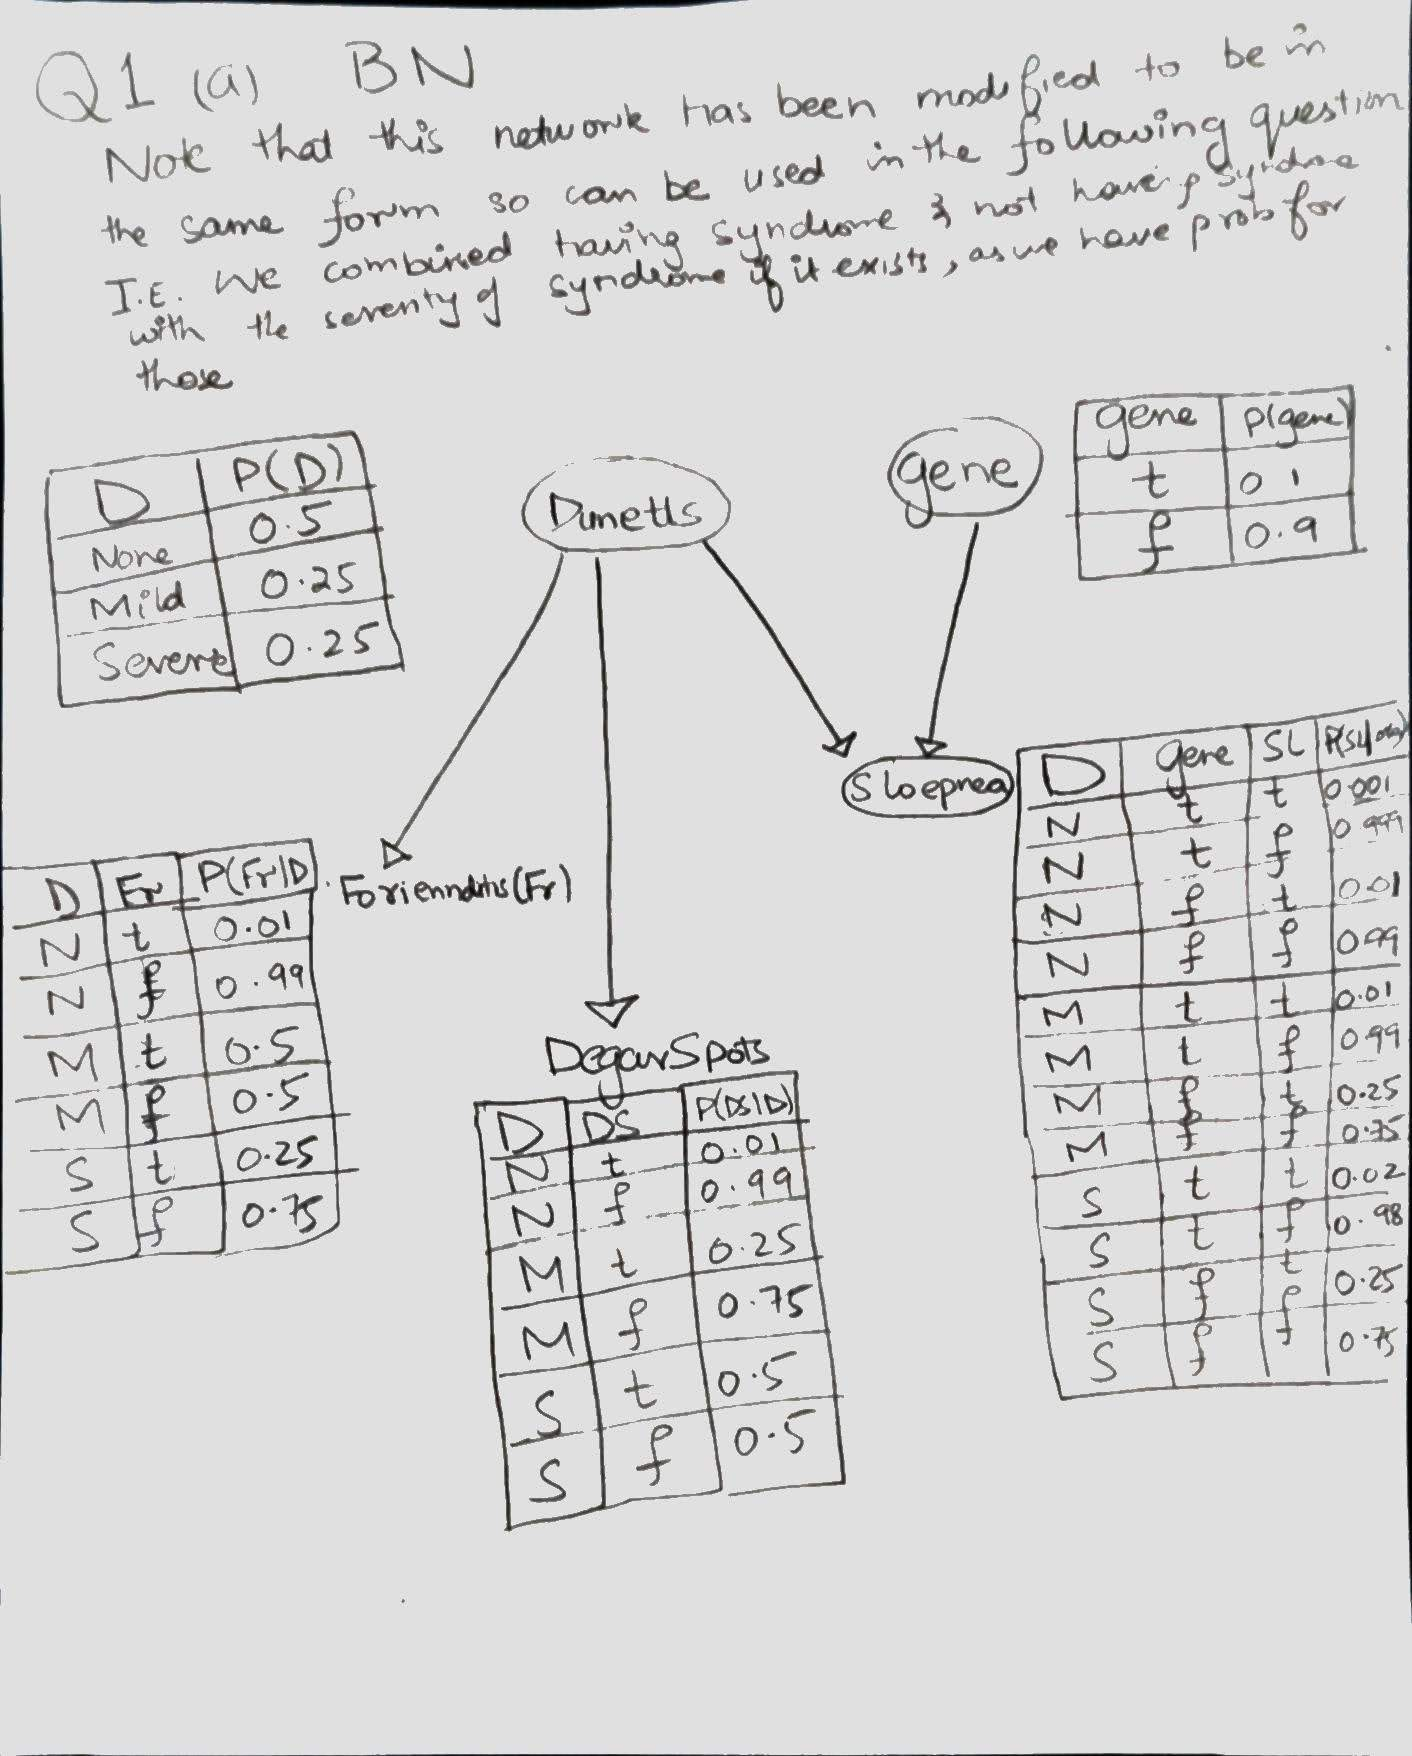

In [50]:


fig = Image(filename=("q1a.A4.jpg"))
display(fig)

The columns D refer to the Dunetts Syndrom, and the values N, M and S refer to No Syndrome, Mild Syndrome or Severe level of Syndrome.

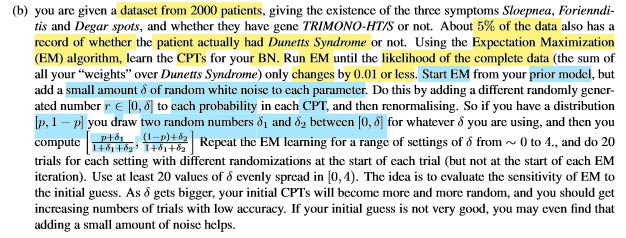

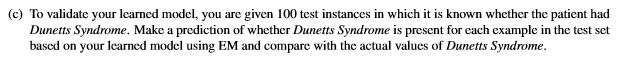

In [54]:
fig = Image(filename=("Q1b.JPG"))
display(fig)
fig = Image(filename=("Q1c.JPG"))
display(fig)


In [1]:
import pandas as pd
import numpy as np
import math
train_dat = pd.read_table("traindata.txt", sep = ' ', names = ['Sloepnea','Foriennditis','Degar', 'gene', 'label'] )
test_dat = pd.read_table("testdata.txt", sep = ' ', names = ['Sloepnea','Foriennditis','Degar', 'gene', 'label'] )
train_dat['index'] = list(range(len(train_dat)))
test_dat['index'] = list(range(len(test_dat)))
train_dat = train_dat.set_index('index')
test_dat = test_dat.set_index('index')

#tuple(train_dat.iloc[3,0:4])
#a.pop()
#a
diff = 1
preval =0

In [2]:
Fo = dict()
Ds = dict()
Sl0 = dict()
Sl1 = dict()
Fo_n = dict()
Ds_n = dict()
Sl0_n = dict()
Sl1_n = dict()
cond = dict()



In [3]:
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

In [65]:
#total run time < 30 seconds
import random
import statistics as st
z2 = 0
#top = 0
x= list()
acc_std = list()
for z2 in my_range(0,4,0.2):
    #top += z2
    x.append(round(z2, 2))

    accuracy  = dict()

    for z in range(20):
        d1 = random.uniform(0,z2)
        d2 = random.uniform(0,z2)
        #followwing initialises the value of the parameters
        Fo[0] = (0.01 +d1)/(1+d1+d2)
        Ds[0] = (0.01 +d1)/(1+d1+d2)
        Sl0[0] = (0.01 +d1)/(1+d1+d2)
        Sl1[0] = (0.001 +d1)/(1+d1+d2)
        cond[0] = (0.5 +d1)/(1+d1+d2)

        Fo[1] = (0.5 +d1)/(1+d1+d2)
        Ds[1] = (0.25 +d1)/(1+d1+d2)
        Sl0[1] = (0.25 +d1)/(1+d1+d2)
        Sl1[1] = (0.01 +d1)/(1+d1+d2)
        cond[1] =( 0.25 +d1)/(1+d1+d2)

        Fo[2] = (0.25 +d1)/(1+d1+d2)
        Ds[2] = (0.5 +d1)/(1+d1+d2)
        Sl0[2] = (0.25 +d1)/(1+d1+d2)
        Sl1[2] = (0.02 +d1)/(1+d1+d2)
        cond[2] = (0.25 +d1)/(1+d1+d2)

        #Following creates a dictionary for every one created above to incorporate the class 0 for each variable 

        for i in {0,1,2}:
            Fo_n[i]=1-Fo[i] 
            Ds_n[i]=1-Ds[i] 
            Sl0_n[i]=1-Sl0[i]
            Sl1_n[i]=1-Sl1[i]



        #the following loop trains the model by updating the values of each parameter
        while diff > 0.01:
            prob = dict()
            l = {0,1}


            for i in l:
                for j in l:
                    for k in l:
                        for m in l:
                            if i == 0:
                            #This makes sure if the parameter is 1 then use one dictionary, and when it is 0, it uses the other
                                a = Fo_n
                            else:
                                a = Fo
                            if j == 0:
                                b = Ds_n
                            else:
                                b = Ds
                            if k == 0:
                                if m == 0:
                                    c = Sl0_n
                                else: 
                                    c = Sl0
                                #the above statements take care of the conditional parameter of symptom that gets suppressed with the presence of a certain gene
                                p1 = a[0]*b[0]*c[0]*cond[0]
                                p2 = a[1]*b[1]*c[1]*cond[1]
                                p3 = a[2]*b[2]*c[2]*cond[2]
                                sums = sum(list((p1,p2,p3)))
                                #following fills up the dictionary with the conditional paramater prob(class|data values)
                                prob[(i,j,k,m)]  = (p1/sums,p2/sums ,p3/sums) 
                            else:
                                if m == 0:
                                    d = Sl1_n
                                else: 
                                    d = Sl1
                                p1 = a[0]*b[0]*d[0]*cond[0]
                                p2 = a[1]*b[1]*d[1]*cond[1]
                                p3 = a[2]*b[2]*d[2]*cond[2]
                                sums = sum(list((p1,p2,p3)))

                                #following fills up the dictionary with the conditional paramater prob(class|data values)
                                prob[(i,j,k,m)]  = (p1/sums,p2/sums ,p3/sums)

            #The following update the values of each parameter (M step of the EM algorithm)
            final = dict()
            for i in range(len(train_dat)):
                a = list(train_dat.iloc[i,0:4])
                try:
                    final[tuple([*a, 0])]
                except:
                    for j in {0,1,2}:
                        final[tuple([*a, j])] = 0
                if train_dat.iloc[i,-1] == -1:
                    for j in {0,1,2}:
                        final[tuple([*a, j])] += prob[tuple(a)][j]
                elif train_dat.iloc[i,-1] == 0:
                    final[tuple([*a, 0])] += 1
                elif train_dat.iloc[i,-1] == 1:
                    final[tuple([*a, 1])] += 1
                elif train_dat.iloc[i,-1] == 2:
                    final[tuple([*a, 2])] += 1
            tot_w = 0
            for i in {0,1,2}:
                globals()["cond_" + str(i)] = 0
                globals()["Fo_"+ str(i)] = 0
                globals()["Ds_"+ str(i)] = 0
                globals()["Sl0_"+ str(i)] = 0
                globals()["Sl1_"+ str(i)] = 0
                globals()["Gene0_"+ str(i)] = 0
                globals()["Gene1_"+ str(i)] = 0

            for (key, value) in final.items():
               # Check if key is even then add pair to new dictionary
                tot_w += value
                for i in {0,1,2}:
                    if key[4] == i:
                        globals()["cond_" + str(i)] += value
                        if key[1]==1:
                            globals()["Fo_"+ str(i)] += value
                        if key[2]==1:    
                            globals()["Ds_"+ str(i)] += value
                        if key[3] == 0:
                            globals()["Gene0_"+ str(i)] += value
                            if key[0] == 1:
                                globals()["Sl0_"+ str(i)] += value

                        if key[3] == 1:
                            globals()["Gene1_"+ str(i)] += value
                            if key[0] == 1:
                                globals()["Sl1_"+ str(i)] += value

            #checks if the condition to leave the while loop is satisfied
            diff = abs(tot_w - preval)
            preval = tot_w

            cond_sum = cond_0 +cond_1+cond_2

            #parameters are updated
            Fo[0] = Fo_0/cond_0
            Ds[0] = Ds_0/cond_0
            Sl0[0] = Sl0_0/Gene0_0
            Sl1[0] = Sl1_0/Gene1_0
            cond[0] = cond_0/cond_sum

            Fo[1] = Fo_1/cond_1
            Ds[1] = Ds_1/cond_1
            Sl0[1] = Sl0_1/Gene0_1
            Sl1[1] = Sl1_1/Gene1_1
            cond[1] = cond_1/cond_sum

            Fo[2] = Fo_2/cond_2
            Ds[2] = Ds_2/cond_2
            Sl0[2] = Sl0_2/Gene0_2
            Sl1[2] = Sl1_2/Gene1_2
            cond[2] = cond_2/cond_sum

            for i in {0,1,2}:
                Fo_n[i]=1-Fo[i] 
                Ds_n[i]=1-Ds[i] 
                Sl0_n[i]=1-Sl0[i]
                Sl1_n[i]=1-Sl1[i]



                ##################################
                # Testing the testing set below  # 
                ##################################
                
                
                
        #creates a tester for the testing data
        test = dict()

        l = {0,1}
        for i in l:
            for j in l:
                for k in l:
                    for m in l:
                        if i == 0:
                            a = Fo_n
                        else:
                            a = Fo
                        if j == 0:
                            b = Ds_n
                        else:
                            b = Ds
                        if k == 0:
                            if m == 0:
                                c = Sl0_n
                            else: 
                                c = Sl0
                            p1 = a[0]*b[0]*c[0]*cond[0]
                            p2 = a[1]*b[1]*c[1]*cond[1]
                            p3 = a[2]*b[2]*c[2]*cond[2]
                            maxs = (p1,p2,p3)


                            #checks the value which is largest amongst teh 3, and outputs the index of that value (which is out estimate for the testing data)
                            test[(i,j,k,m)]  = maxs.index(max(maxs)) 
                        else:
                            if m == 0:
                                d = Sl1_n
                            else: 
                                d = Sl1
                            p1 = a[0]*b[0]*d[0]*cond[0]
                            p2 = a[1]*b[1]*d[1]*cond[1]
                            p3 = a[2]*b[2]*d[2]*cond[2]
                            maxs = (p1, p2, p3)

                            #checks the value which is largest amongst teh 3, and outputs the index of that value (which is out estimate for the testing data)
                            test[(i,j,k,m)]  = maxs.index(max(maxs))  #(p1/sums,p2/sums ,p3/sums)

        #following is the testing of the test data                
        testing = dict()
        #creates a counter to see the correct predictions
        cn1 = 0

        for i in range(len(test_dat)):
            a = list(test_dat.iloc[i,0:4])

            #this is the real label of the data
            act = test_dat.iloc[i,-1]
            if test[tuple(a)] == act:
                cn1 +=1

            testing[tuple([*a, i])] = (test[tuple(a)], act)


        accuracy[z] = cn1
    
    l = list()
    for i in list(accuracy.items()):
        l.append(i[1])
    #the following collects the values of mean accuracy and std dev of each iteration
    acc_std.append((st.mean(l), st.stdev(l)))


In [66]:

y = list()
error = list()
for i in range(len(acc_std)):
        y.append(acc_std[i][0])
        error.append(acc_std[i][1])

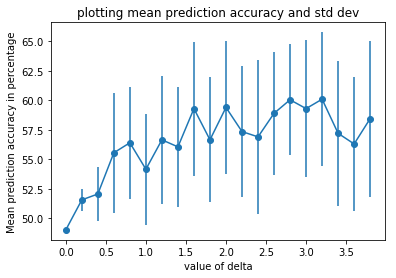

Delta Mean Accuracy std_dev
      0      1         2
0   0.0  49.00  0.000000
1   0.2  51.55  0.944513
2   0.4  52.05  2.258901
3   0.6  55.55  5.114222
4   0.8  56.40  4.739531
5   1.0  54.15  4.693501
6   1.2  56.65  5.460625
7   1.4  56.05  5.114222
8   1.6  59.30  5.694873
9   1.8  56.65  5.314083
10  2.0  59.40  5.679140
11  2.2  57.35  5.575086
12  2.4  56.90  6.512336
13  2.6  58.90  5.200202
14  2.8  60.05  4.695743
15  3.0  59.30  5.813777
16  3.2  60.10  5.683772
17  3.4  57.20  6.135316
18  3.6  56.30  5.657785
19  3.8  58.45  6.629083


In [78]:
import matplotlib.pyplot as mpl
import random 
fig, ax = mpl.subplots()

ax.errorbar(x, y,
            yerr=error,
              fmt='-o')

ax.set_xlabel('value of delta')
ax.set_ylabel('Mean prediction accuracy in percentage')
ax.set_title('plotting mean prediction accuracy and std dev')


mpl.show()
x1 = pd.DataFrame(x)
y1 = pd.DataFrame(y)
e2 = pd.DataFrame(error)
print("Delta", "Mean Accuracy", "std_dev")
print(pd.concat([x1,y1,e2], axis=1, ignore_index=True))


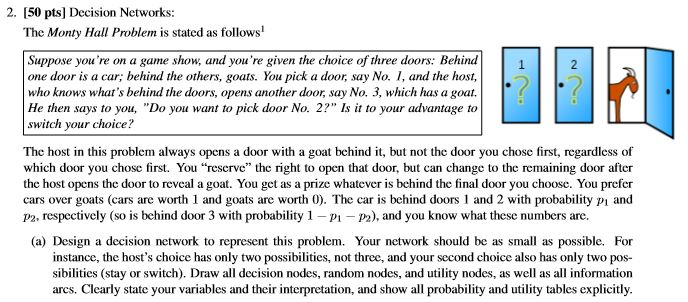

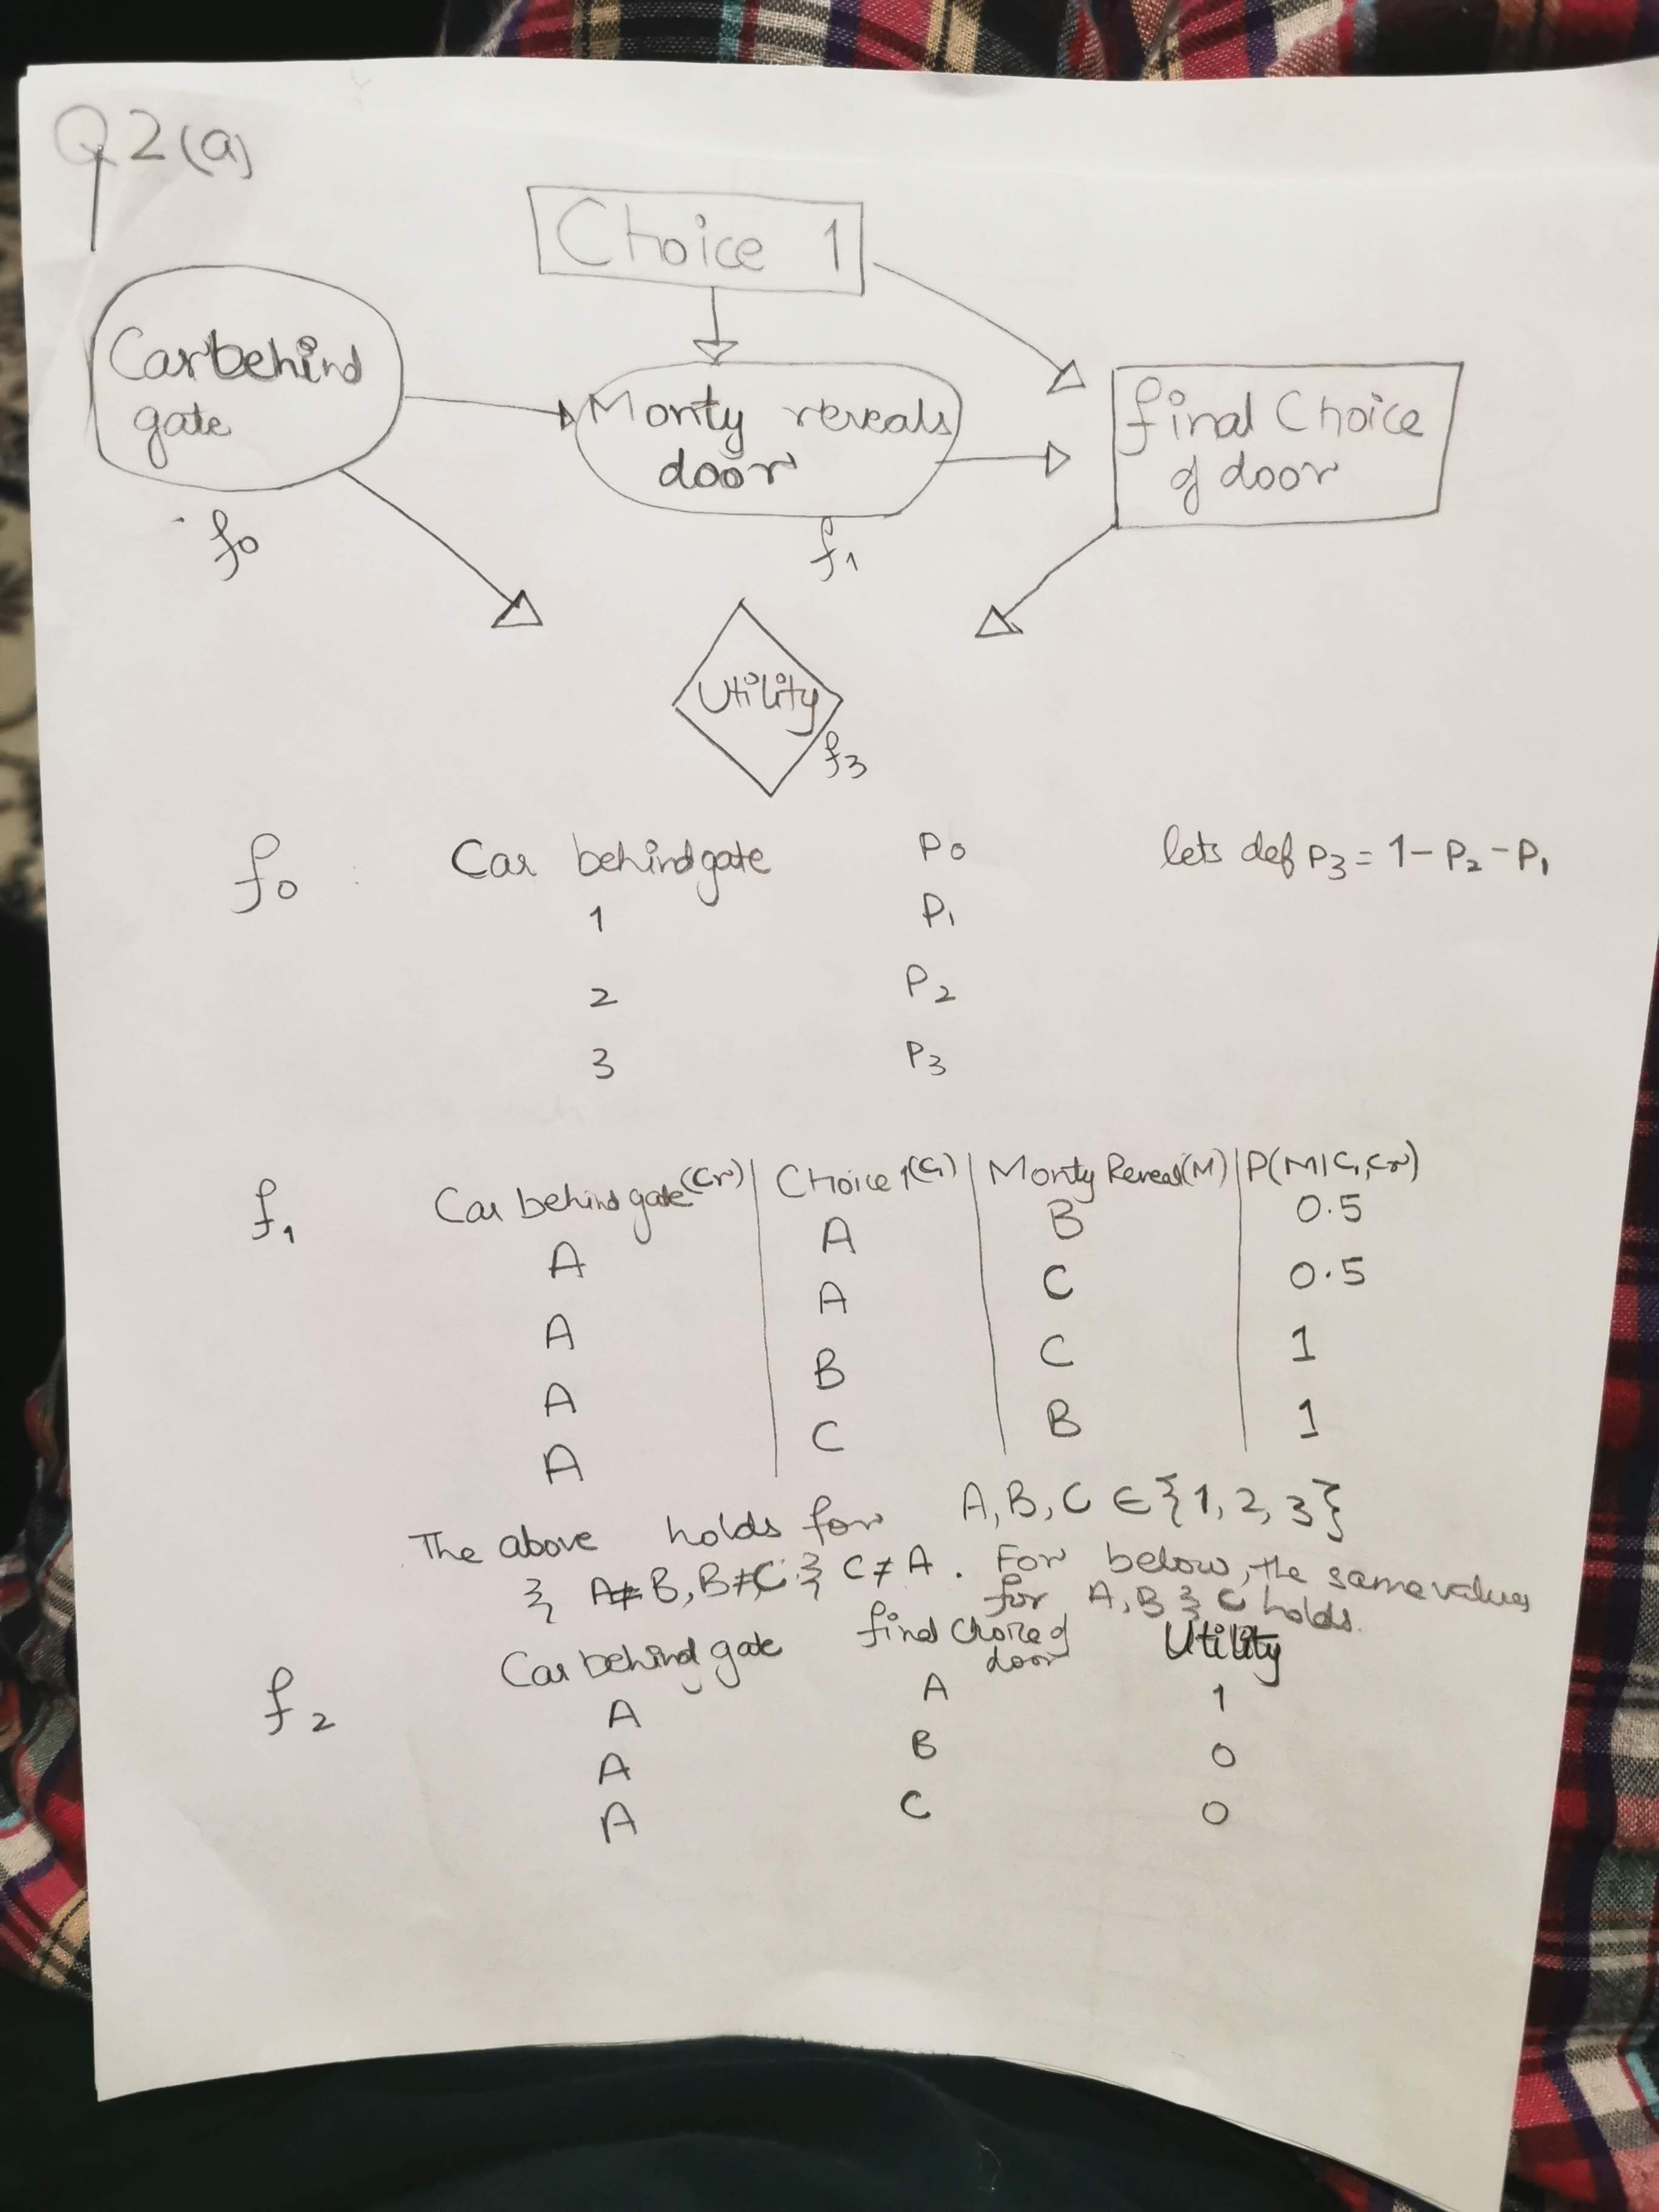

In [72]:
fig = Image(filename=("Q2a.JPG"))
display(fig)
fig = Image(filename=("q2a.a4.jpg"))
display(fig)

Car behind gate = random variable taking values of 1, 2 or 3 for car being behind gate 1, 2 or 3

Monty reveal door = random variable, taking values of 1, 2 or 3. This door has a goat behind it, and is dependent on the first choice of the player

Choice 1 = decision variable, telling the first choice of the player, can take the values of 1,2 or 3

final Choice = decision variable, telling the final choice of the player, after Monty reveals the door with goat.



NOTE: wherever A,B,C takes place of gate 1,2 or 3, it essentially is present to remove redundancy in writing out the same expression in the table 3 times, as A can take the values of 1, 2 or 3 and the corresponding probabilities update which are labelled as $p_A, p_B $ or $p_C$

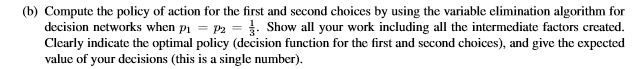

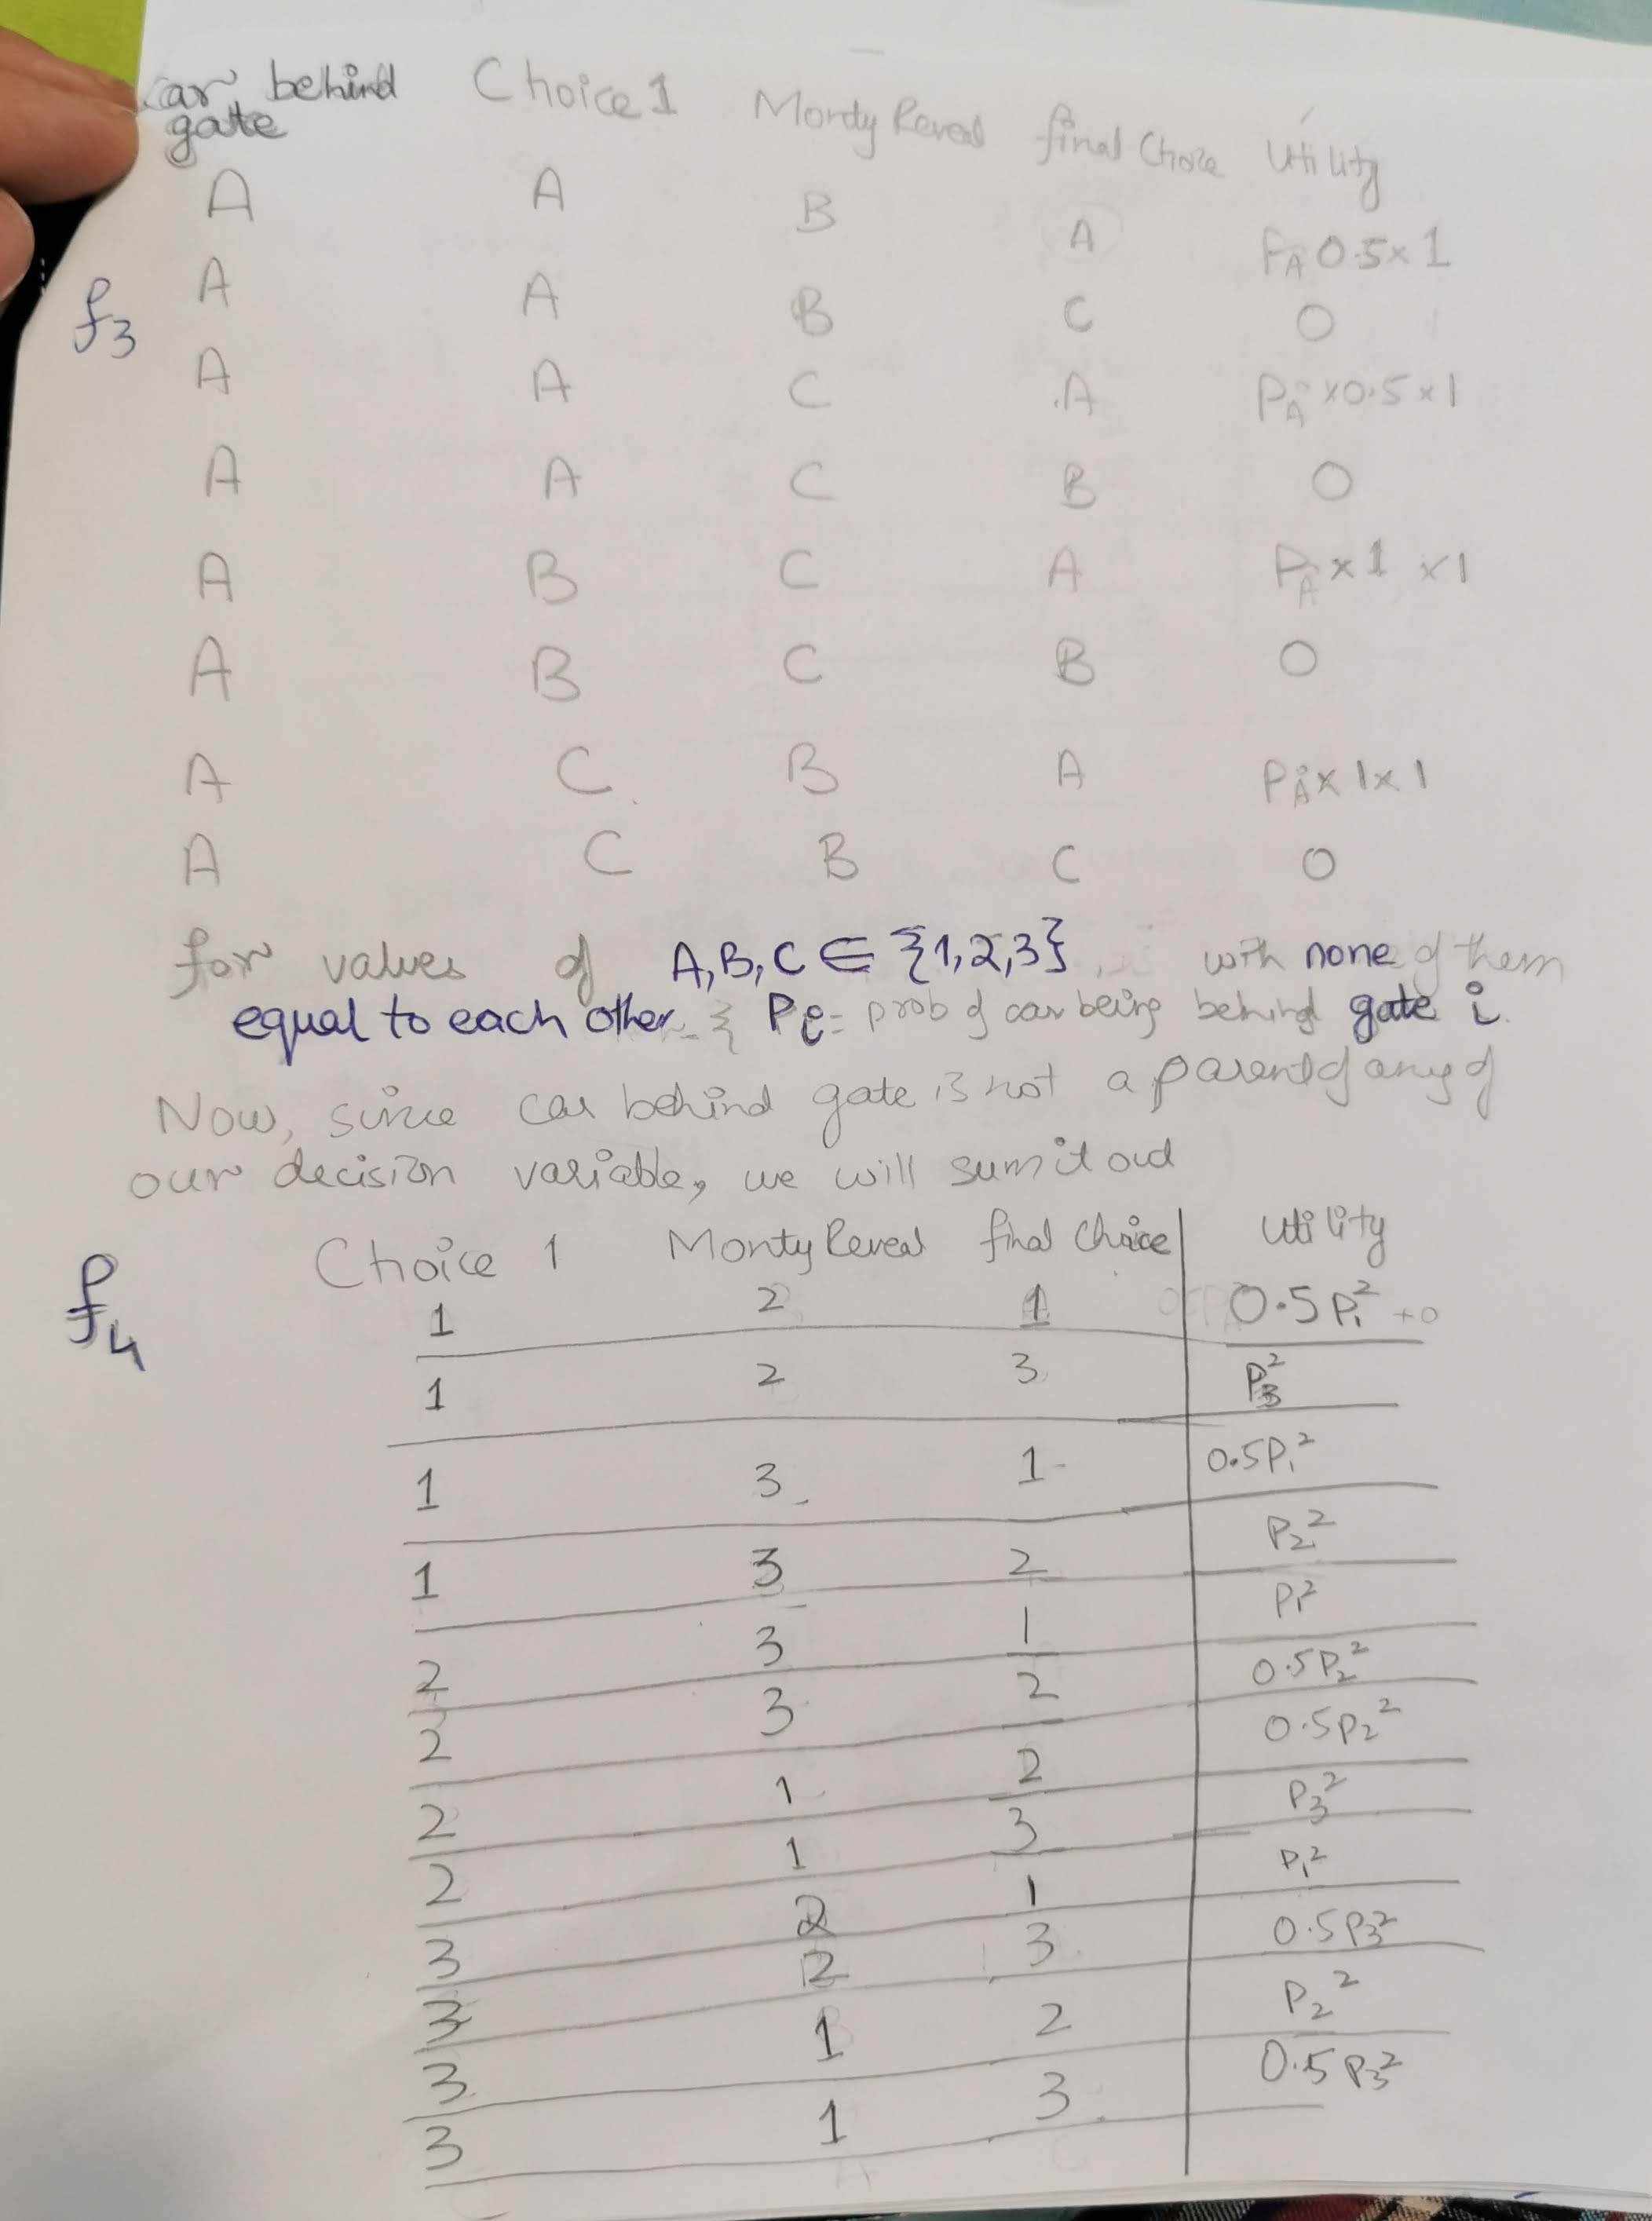

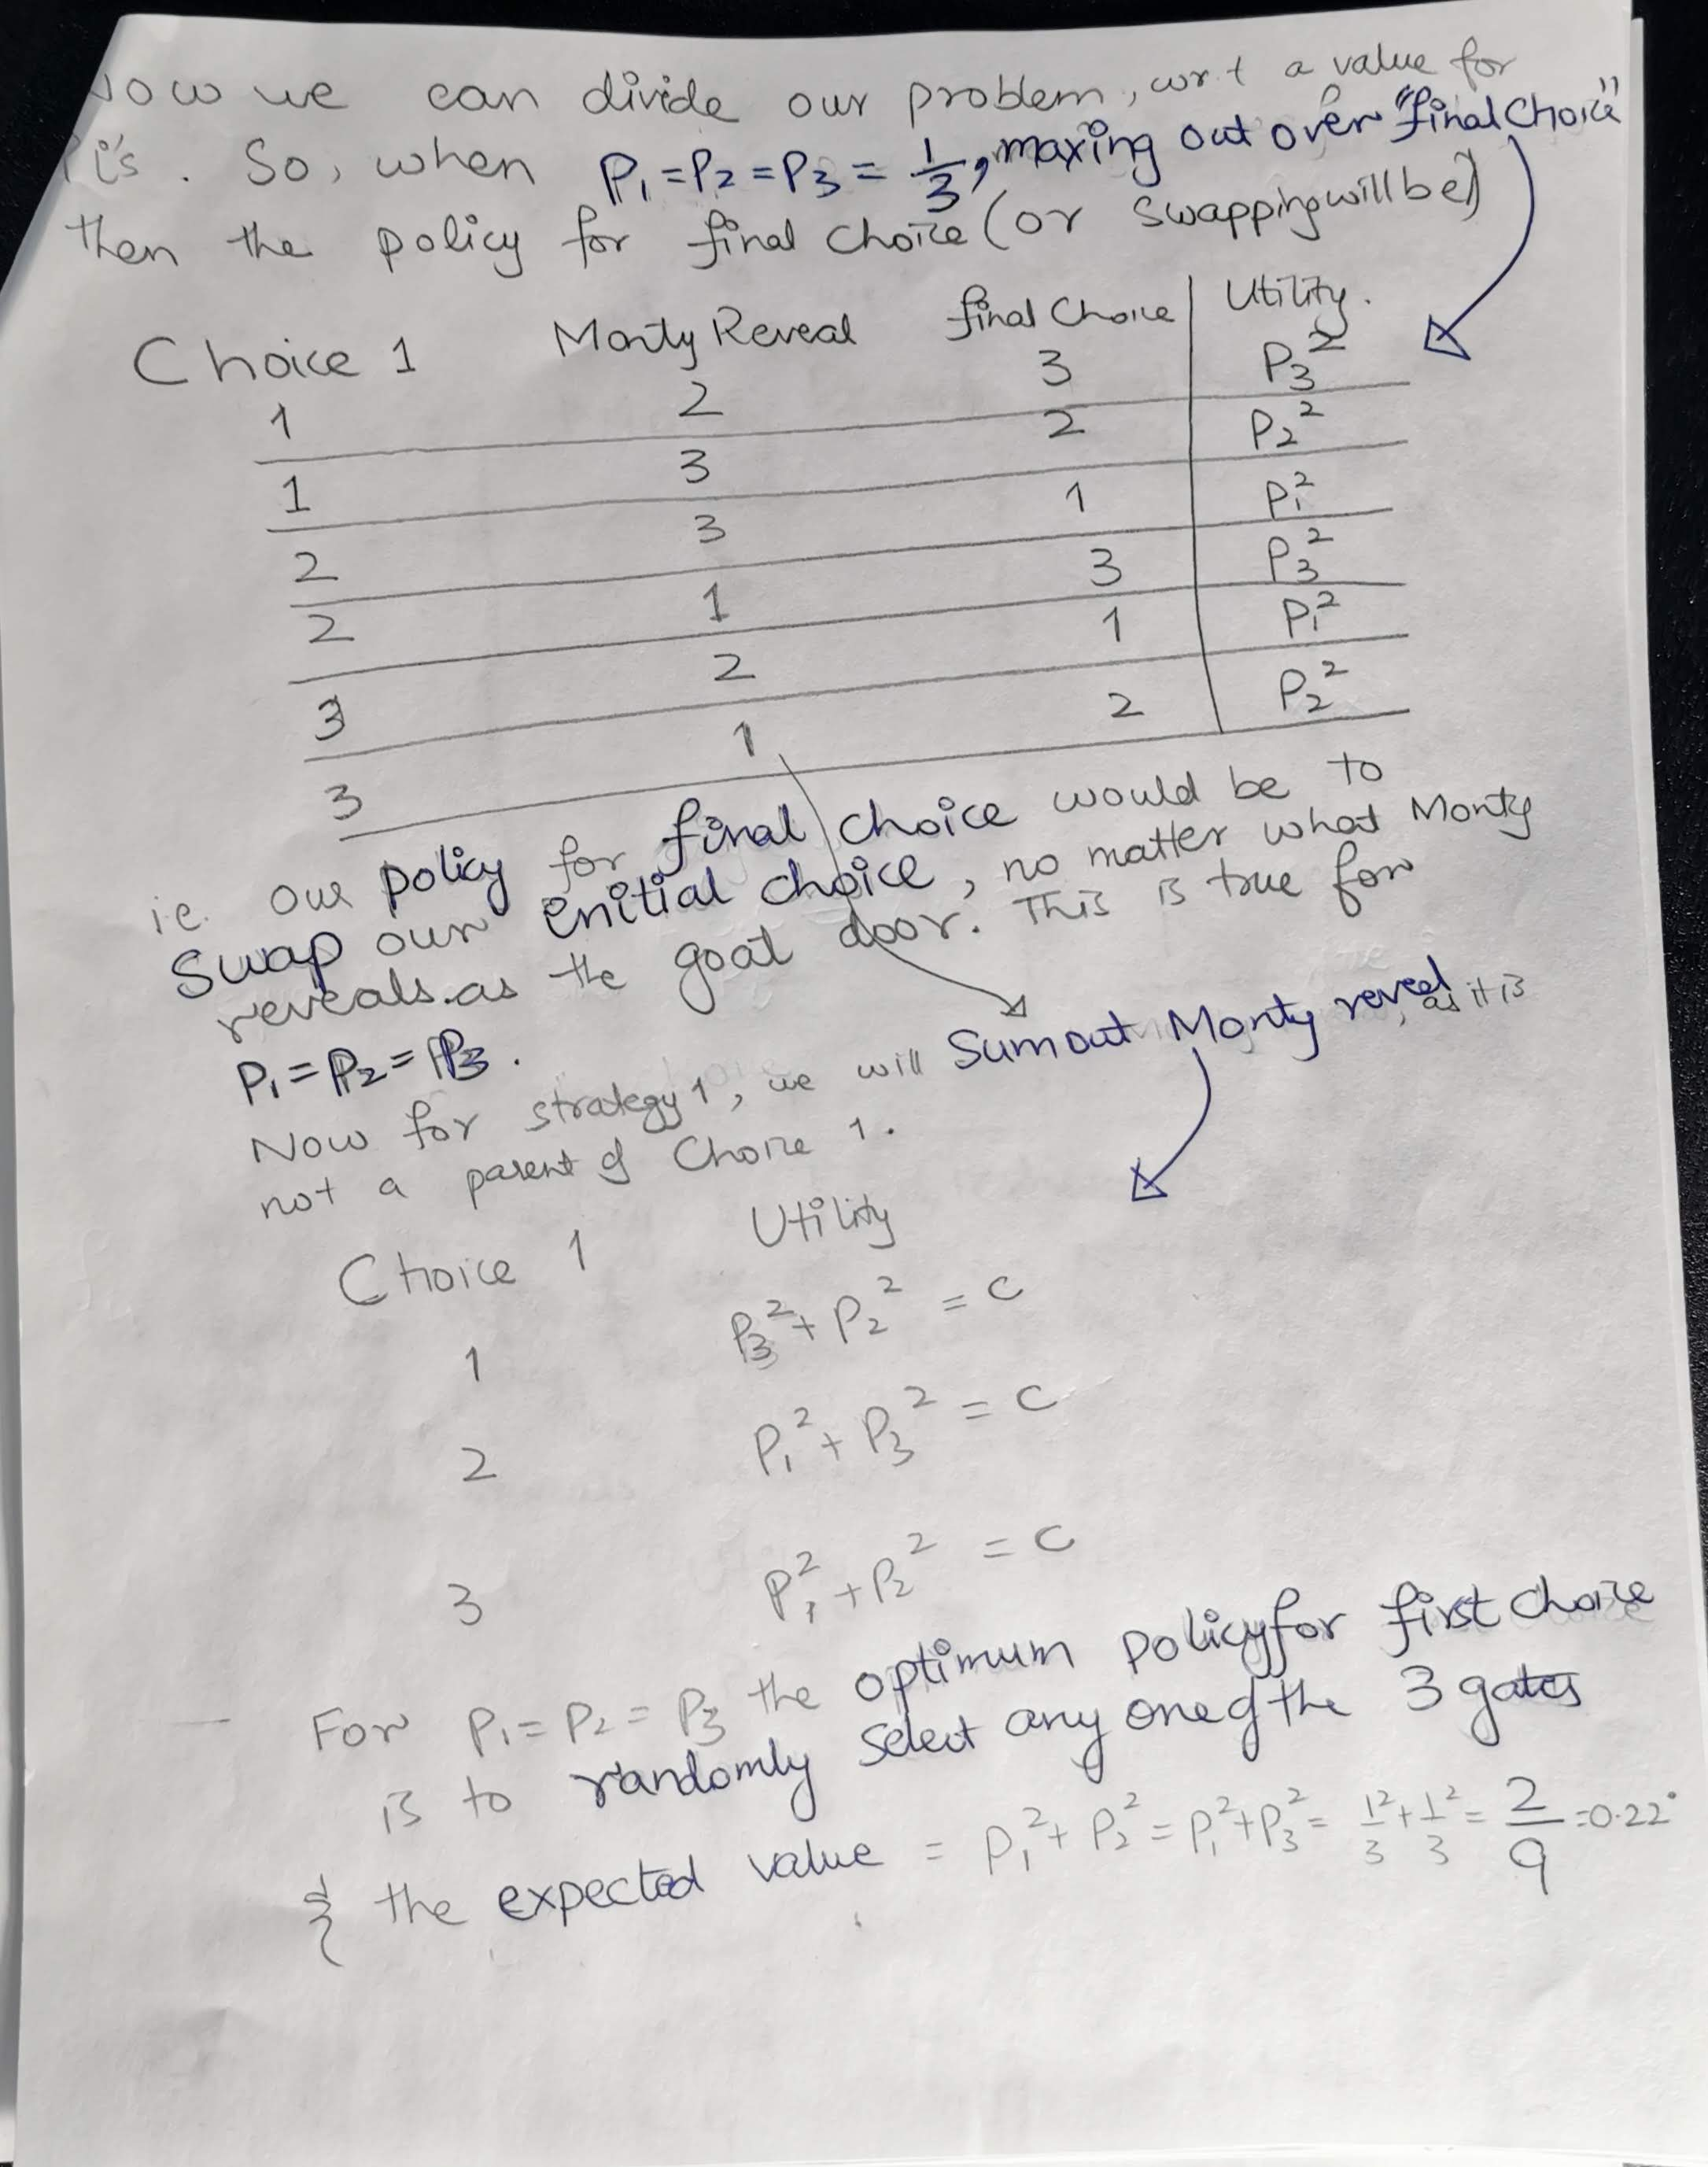

In [74]:
fig = Image(filename=("Q2b.JPG"))
display(fig)
fig = Image(filename=("q2b_1.A4.jpg"))
display(fig)
fig = Image(filename=("q2b_2.A4.jpg"))
display(fig)

NOTE: wherever A,B,C takes place of gate 1,2 or 3, it essentially is present to remove redundancy in writing out the same expression in the table 3 times, as A can take the values of 1, 2 or 3 and the corresponding probabilities update which are labelled as $p_A, p_B $ or $p_C$

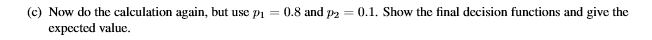

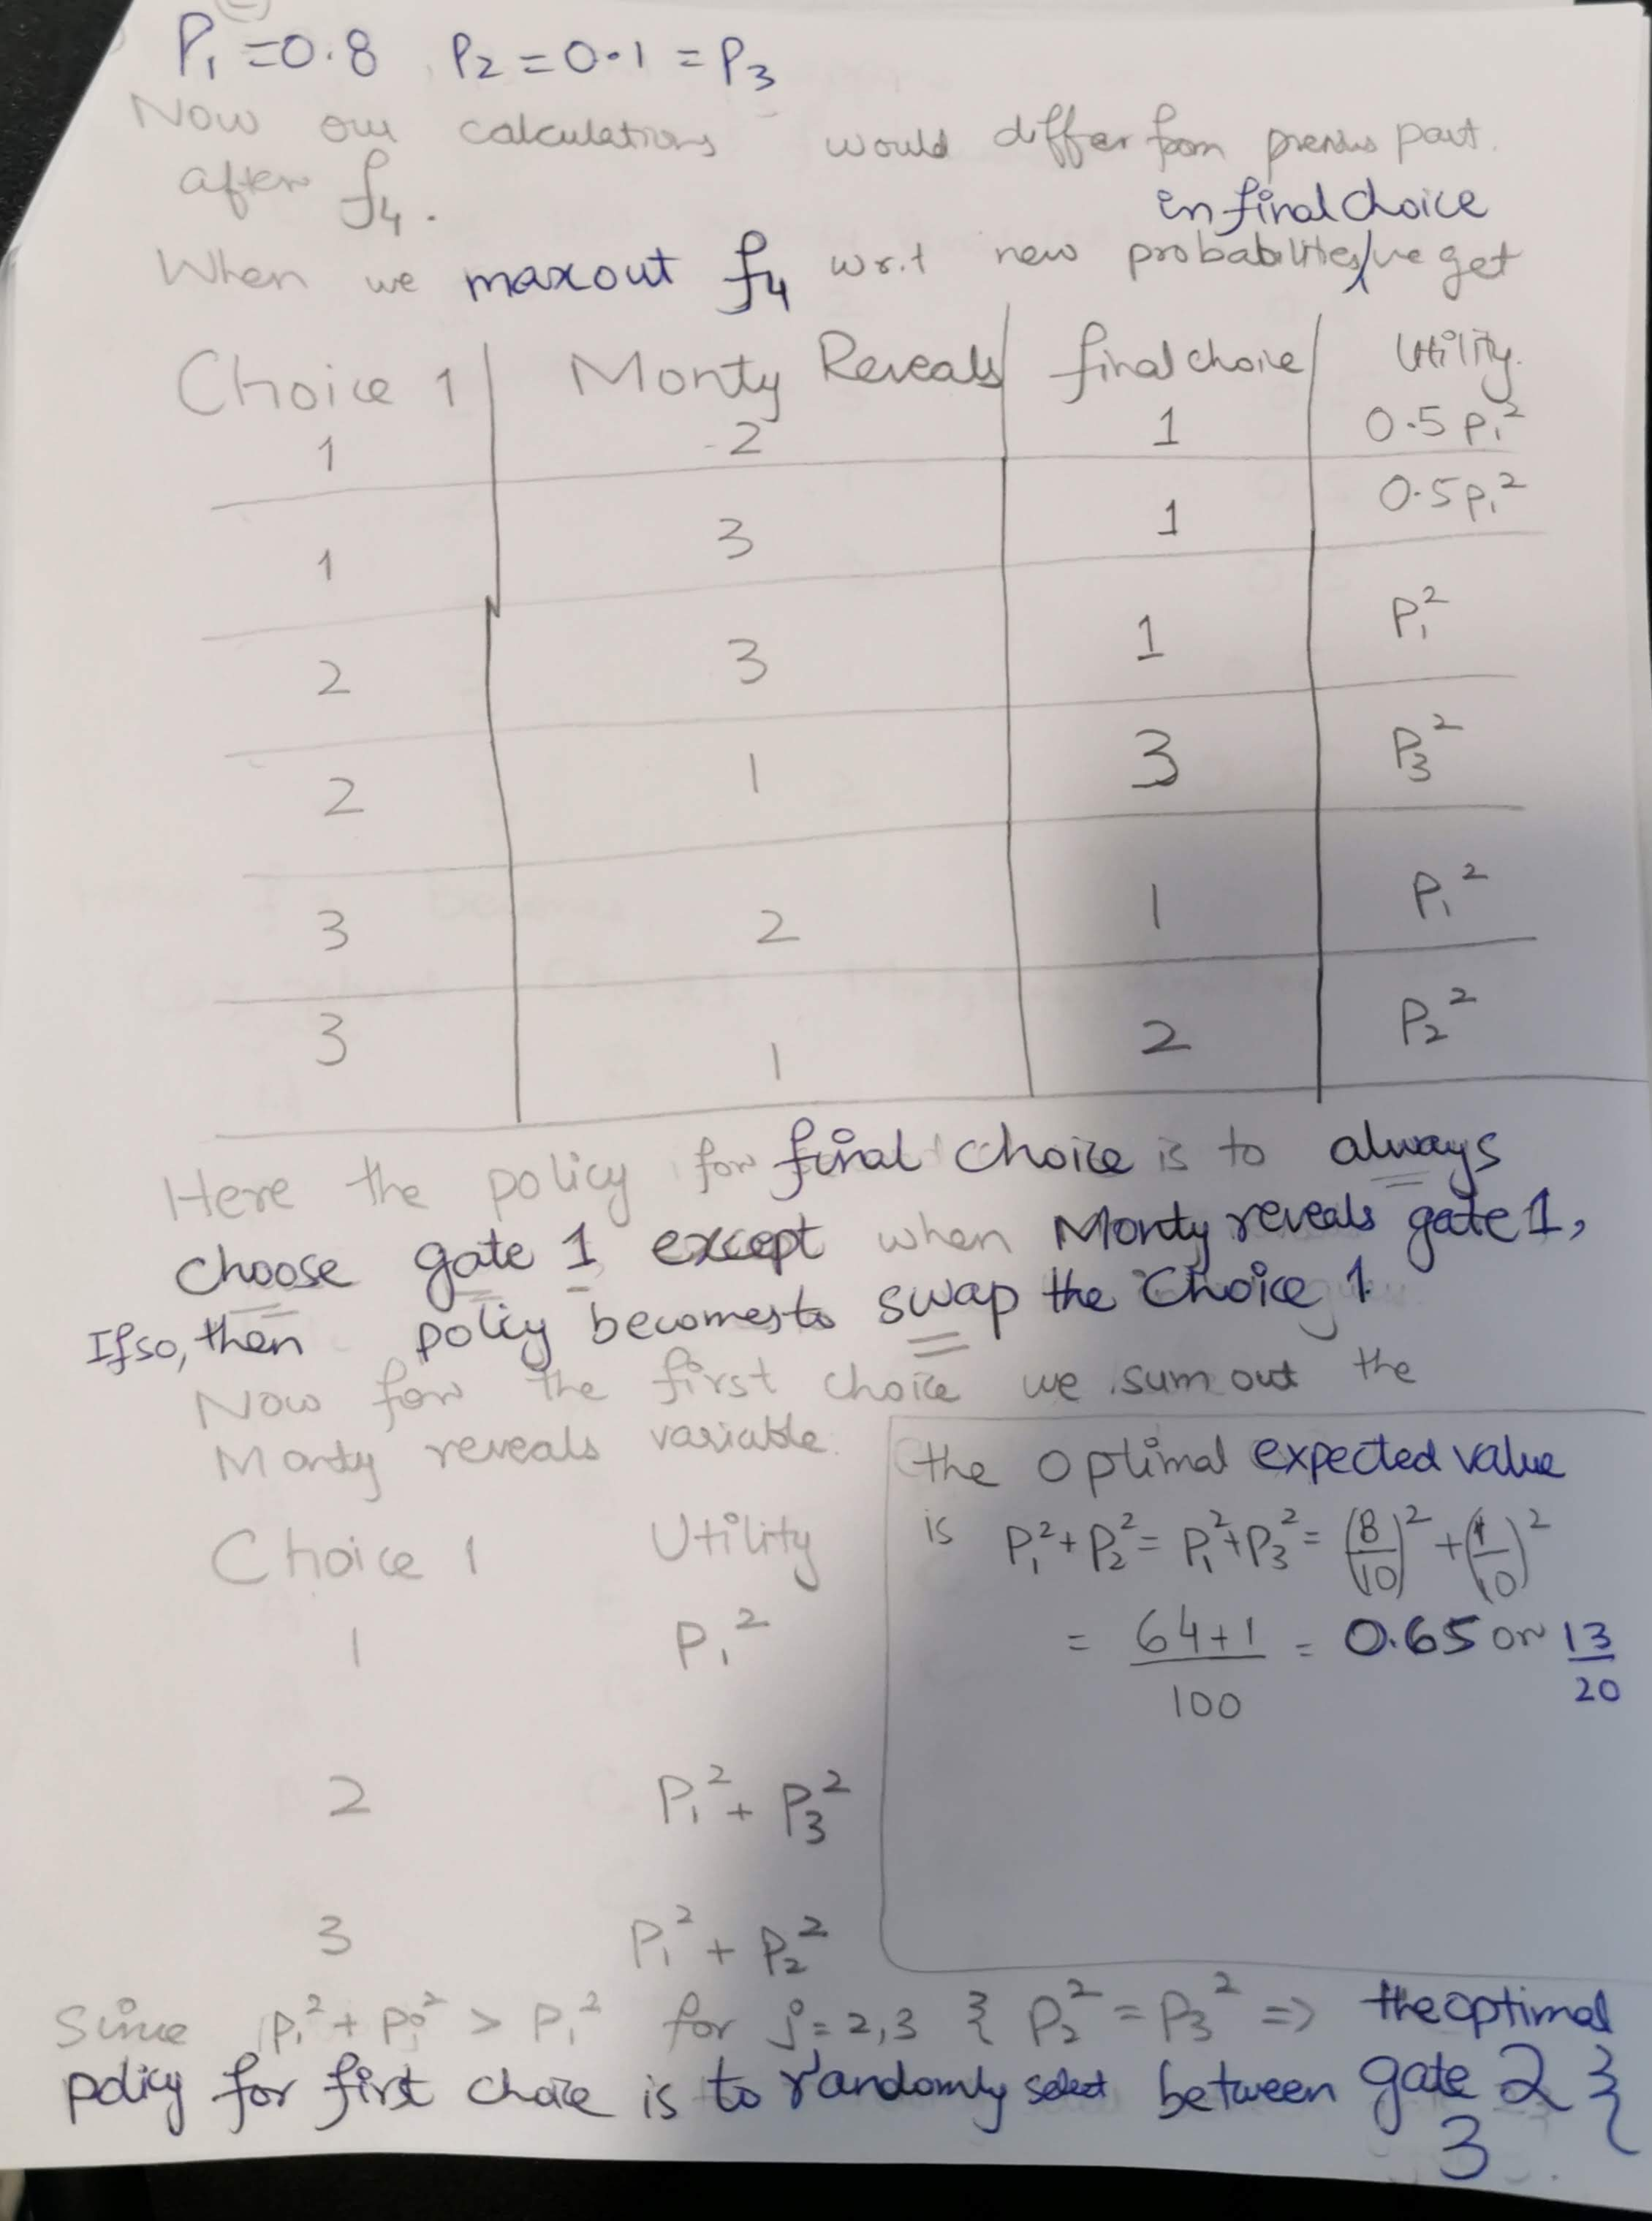

In [75]:
fig = Image(filename=("Q2c.JPG"))
display(fig)
fig = Image(filename=("q2c.jpg"))
display(fig)

NOTE: wherever A,B,C takes place of gate 1,2 or 3, it essentially is present to remove redundancy in writing out the same expression in the table 3 times, as A can take the values of 1, 2 or 3 and the corresponding probabilities update which are labelled as $p_A, p_B $ or $p_C$

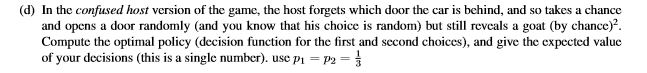

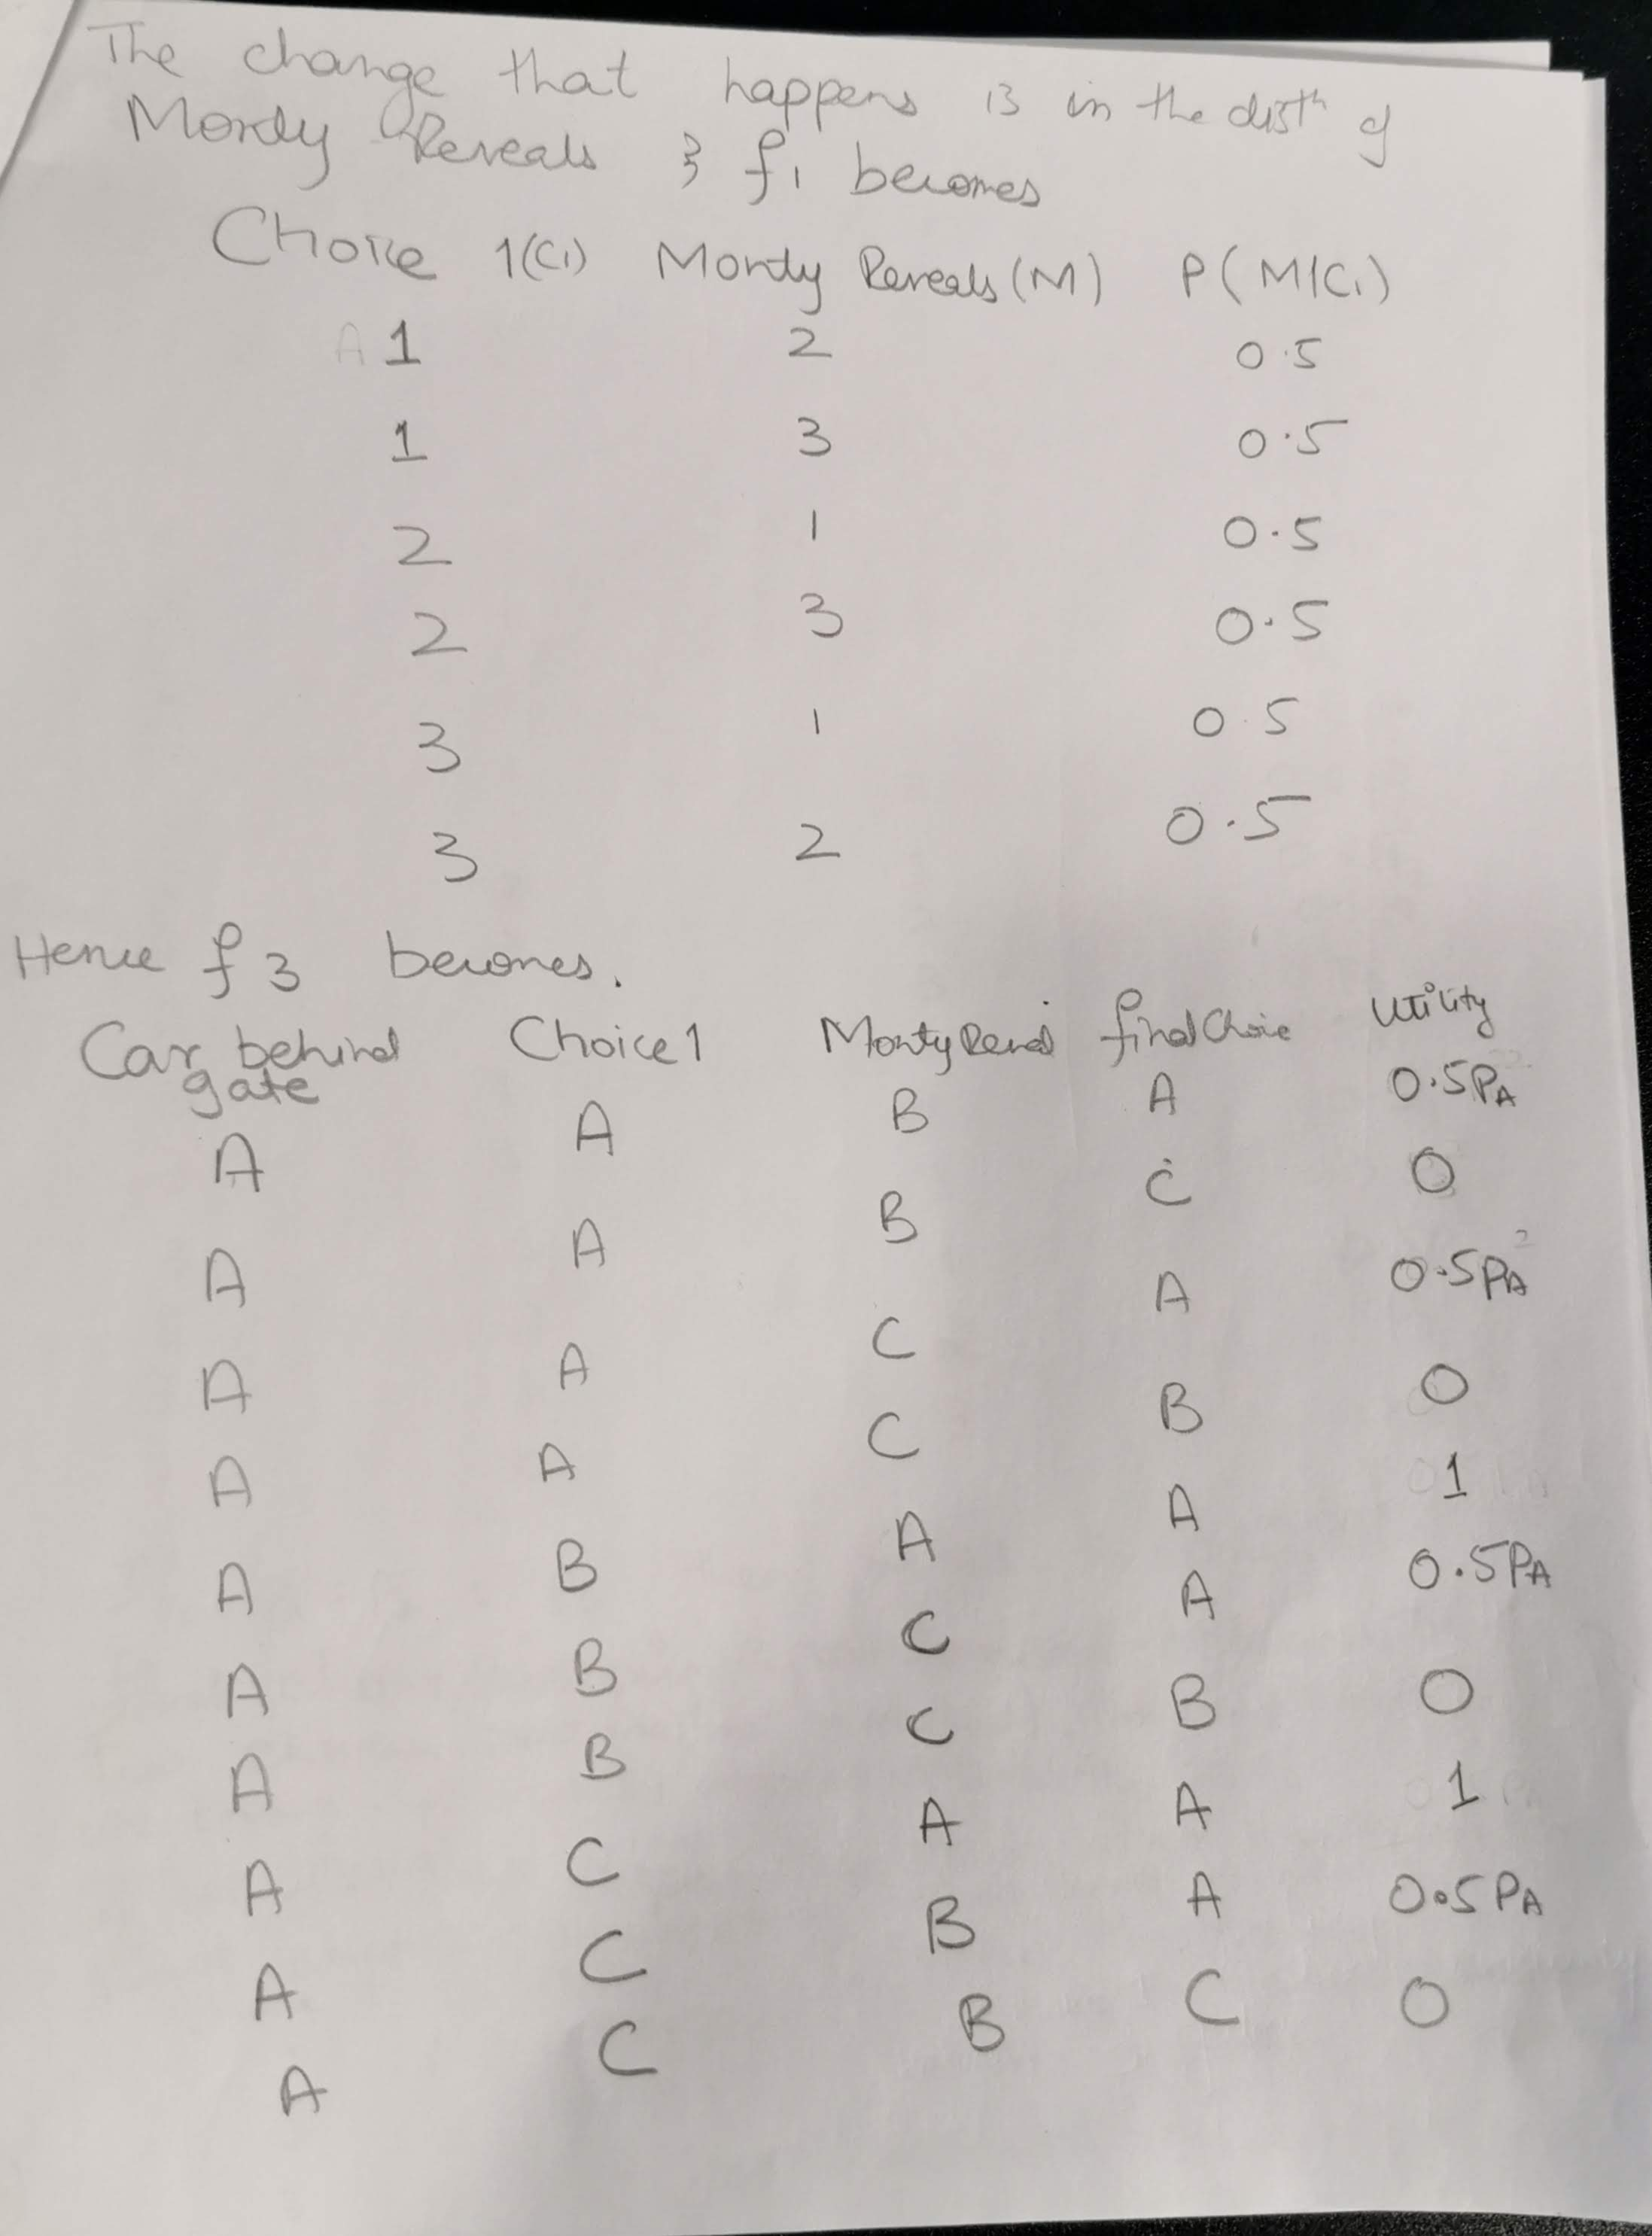

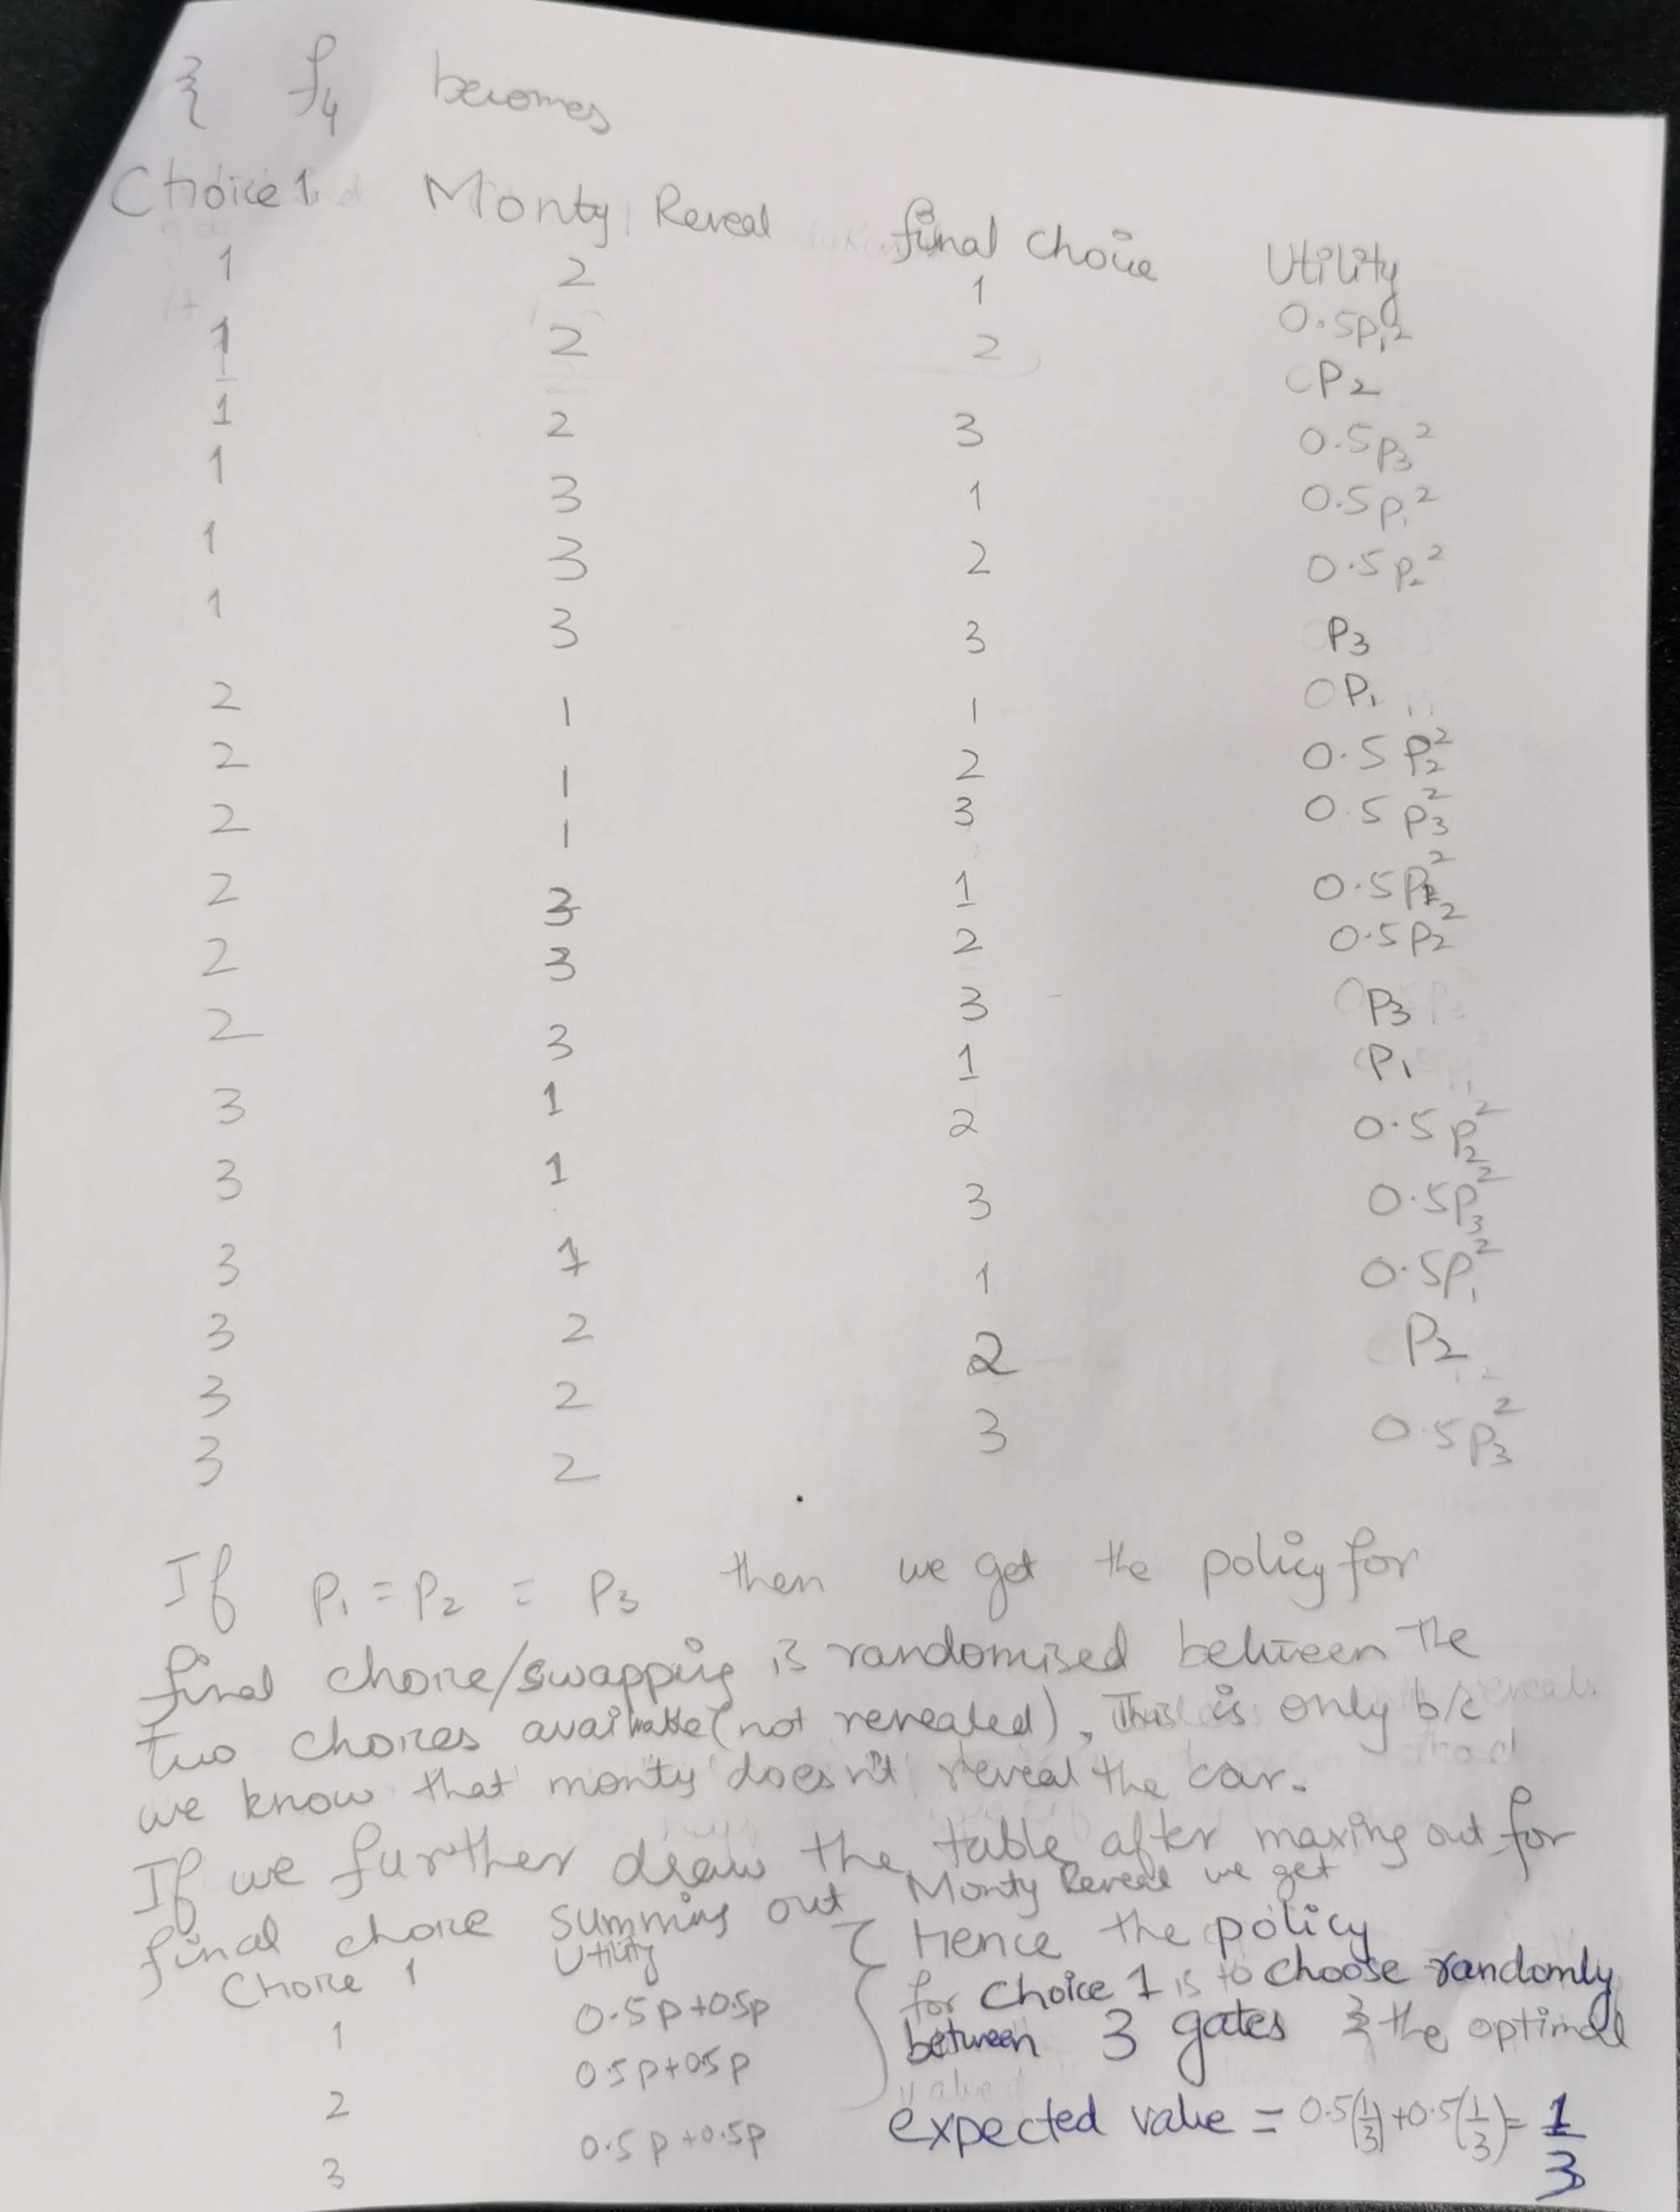

In [76]:
fig = Image(filename=("Q2d.JPG"))
display(fig)

fig = Image(filename=("q2d_1.jpg"))
display(fig)
fig = Image(filename=("q2d_2.jpg"))
display(fig)